In [4]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import binarize
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Load MNIST dataset
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0  # Normalize to [0,1] and flatten
X_test = X_test.reshape(-1, 784) / 255.0

# Binarize the images, as RBMs work best with binary input
X_train_bin = binarize(X_train, threshold=0.5)
X_test_bin = binarize(X_test, threshold=0.5)

# Initialize RBM
rbm = BernoulliRBM(n_components=128, learning_rate=0.06, n_iter=100, random_state=0)

# Fit RBM to the MNIST training data
rbm.fit(X_train_bin)

# Extract embeddings (transform) for train and test sets
X_train_embedded = rbm.transform(X_train_bin)
X_test_embedded = rbm.transform(X_test_bin)

print("Embedding shape:", X_train_embedded.shape)  # (60000, 128) for 128-dimensional embedding


Embedding shape: (60000, 128)


In [5]:
X_test_embedded

array([[4.52739189e-30, 9.72768560e-01, 9.99999968e-01, ...,
        1.09662925e-23, 9.64759277e-01, 2.99301221e-11],
       [1.22737692e-29, 5.56839316e-14, 9.58246131e-04, ...,
        5.57825412e-47, 6.98720199e-04, 2.49001119e-06],
       [1.10457126e-02, 3.94005941e-18, 6.43227898e-03, ...,
        1.06013446e-02, 1.21671990e-08, 1.03934543e-09],
       ...,
       [5.21356075e-15, 8.81461936e-17, 5.84270355e-02, ...,
        4.96319653e-03, 1.97703327e-11, 8.31174572e-15],
       [4.60896583e-16, 2.15136809e-16, 9.99999987e-01, ...,
        6.05144302e-28, 9.99999424e-01, 8.77589408e-01],
       [1.73161721e-22, 7.89626544e-01, 6.25599920e-59, ...,
        4.76710216e-35, 8.46850508e-27, 7.86108780e-46]])

In [6]:
from umap import UMAP
import matplotlib.pyplot as plt

/home/leo/miniforge3/envs/tensorflow/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


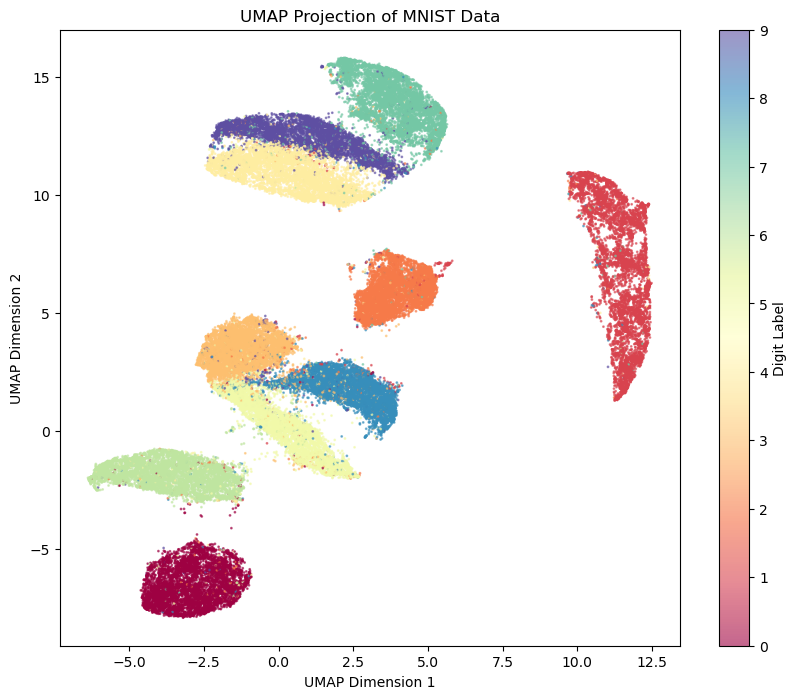

In [7]:
# Initialize UMAP with desired parameters
umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data
X_train_umap = umap.fit_transform(X_train_embedded)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap="Spectral", s=1, alpha=0.6)
plt.colorbar(scatter, label="Digit Label")
plt.title("UMAP Projection of MNIST Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

/home/leo/miniforge3/envs/tensorflow/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


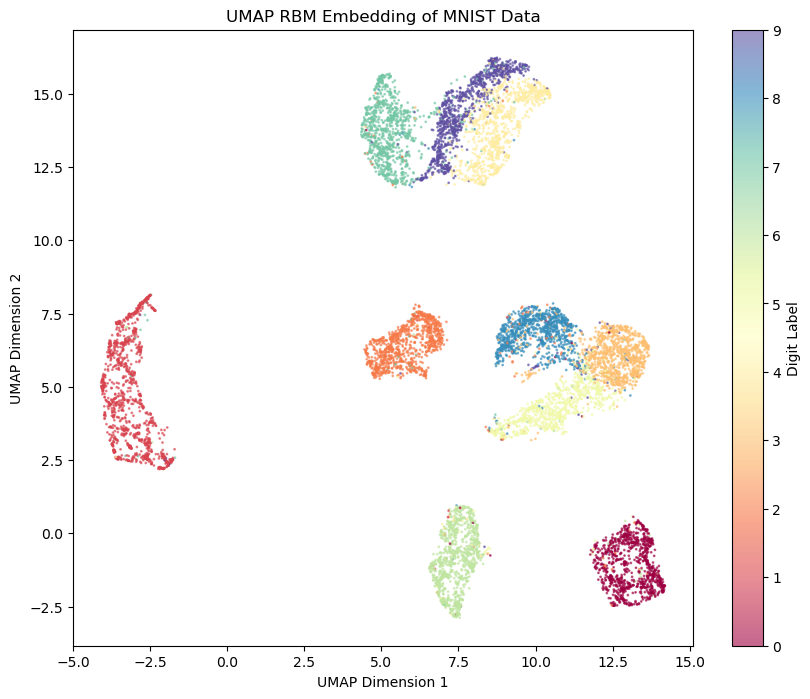

In [8]:
# Initialize UMAP with desired parameters
umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data
X_test_umap = umap.fit_transform(X_test_embedded)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_test, cmap="Spectral", s=1, alpha=0.6)
plt.colorbar(scatter, label="Digit Label")
plt.title("UMAP RBM Embedding of MNIST Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


/home/leo/miniforge3/envs/tensorflow/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


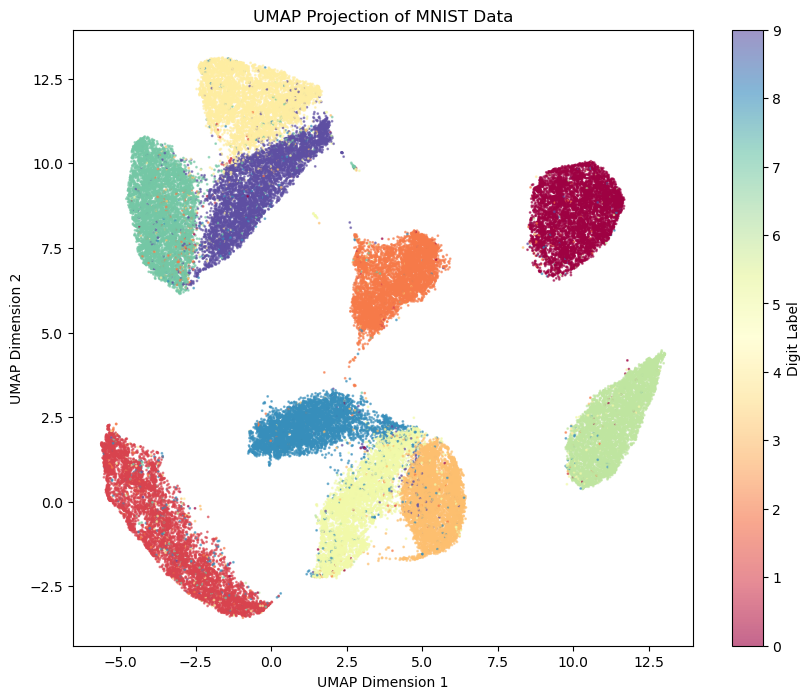

In [11]:
# Initialize UMAP with desired parameters
umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data
X_umap = umap.fit_transform(X_train_bin)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap="Spectral", s=1, alpha=0.6)
plt.colorbar(scatter, label="Digit Label")
plt.title("UMAP Projection of MNIST Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()
